## Данный проект основан на опросе среди 1-4 курса факультета географии ВШЭ

#### Первым этапом является загрузка библиотек и чтение таблицы

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('dataset2.csv', sep=';', on_bad_lines='skip')

df.head(10)

,gender,course,free_time,feeling,walking,hobby,importance,animal,form
0,Мужчина,2,Гулять,Встать без будильника,По городу,Рисование,Поесть очень вкусную еду в не очень красивом м...,Кота,Да
1,Мужчина,2,Компьютерные игры,Встать без будильника,На природе,Музыка,Поесть очень вкусную еду в не очень красивом м...,Кота,Да
2,Мужчина,1,Компьютерные игры,Сесть на свободное место в полном вагоне метро,По городу,Рисование,Поесть очень вкусную еду в не очень красивом м...,Не хочу заводить питомцев,Да
3,Женщина,2,Спорт,В столовой любимый комплексный обед,На природе,Танцы,Поесть очень вкусную еду в не очень красивом м...,Собаку,Да
4,Женщина,1,Смотреть фильмы/сериалы/аниме,Встать без будильника,На природе,Лепка из глины,Поесть очень вкусную еду в не очень красивом м...,Кота,Да
5,Женщина,1,Гулять,Встать без будильника,На природе,Иностранные языки,Поесть очень вкусную еду в не очень красивом м...,Собаку,Да
6,Мужчина,2,Слушать музыку,Встать без будильника,По городу,Мыловарение,Поесть очень вкусную еду в не очень красивом м...,Кота,Да
7,Мужчина,1,Спорт,Сесть на свободное место в полном вагоне метро,На природе,Рисование,Поесть не очень вкусную еду в очень красивом м...,Собаку,Да
8,Женщина,1,Спать,Встать без будильника,На природе,Пение,Поесть очень вкусную еду в не очень красивом м...,Собаку,Да
9,Женщина,1,Слушать музыку,Встать без будильника,На природе,Танцы,Поесть не очень вкусную еду в очень красивом м...,Собаку,Да


#### Построение графика зависимости варианта препровождения свободного времени от пола

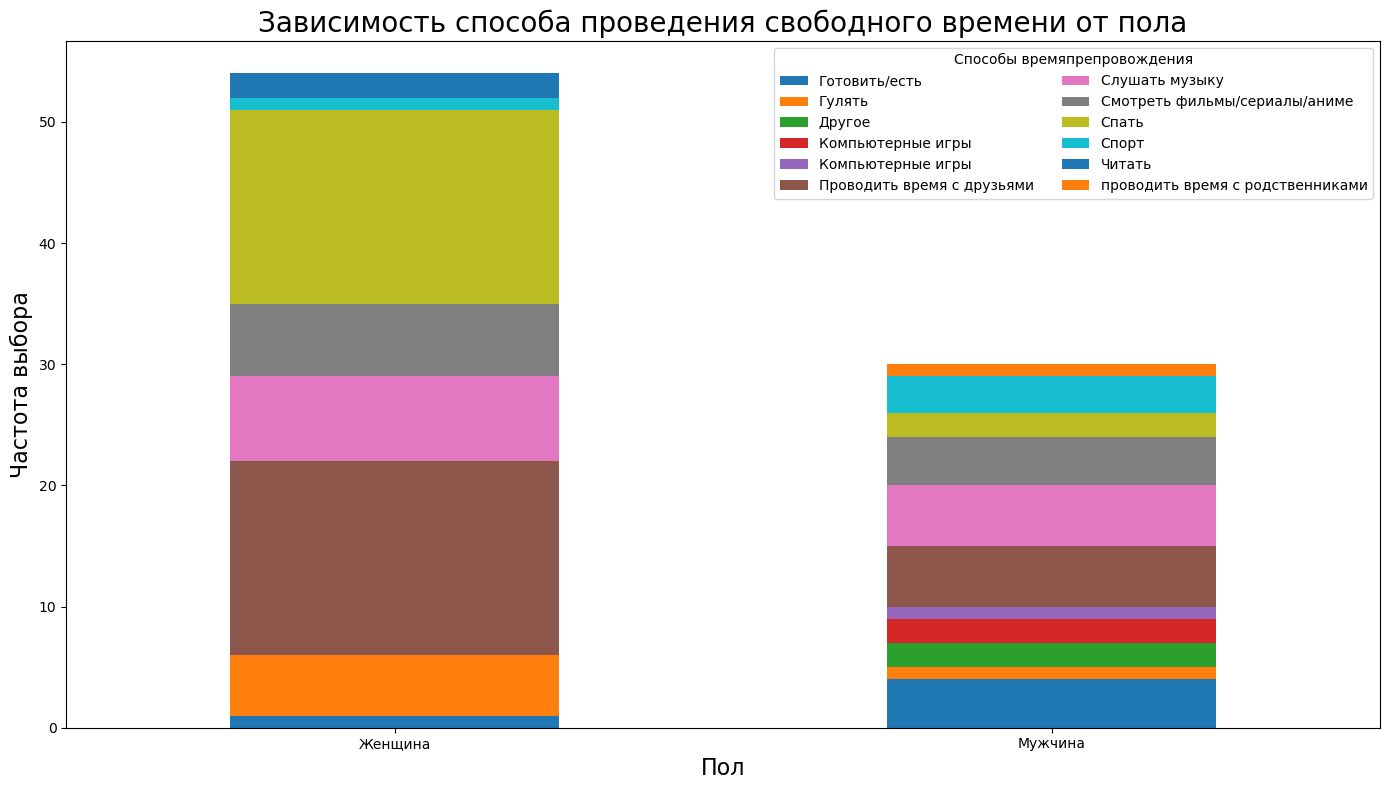

In [28]:
df = pd.read_csv('dataset2.csv', sep=';', on_bad_lines='skip')

cross_tab_reloaded = pd.crosstab(df['gender'], df['free_time'])

cross_tab_reloaded.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Зависимость способа проведения свободного времени от пола', fontsize = 20)
plt.xlabel('Пол', fontsize = 16)
plt.ylabel('Частота выбора', fontsize = 16)
plt.xticks(rotation=0)
plt.legend(title='Способы времяпрепровождения', ncol=2) 
plt.tight_layout()
plt.show()

#### Частота выбранных любимых хобби

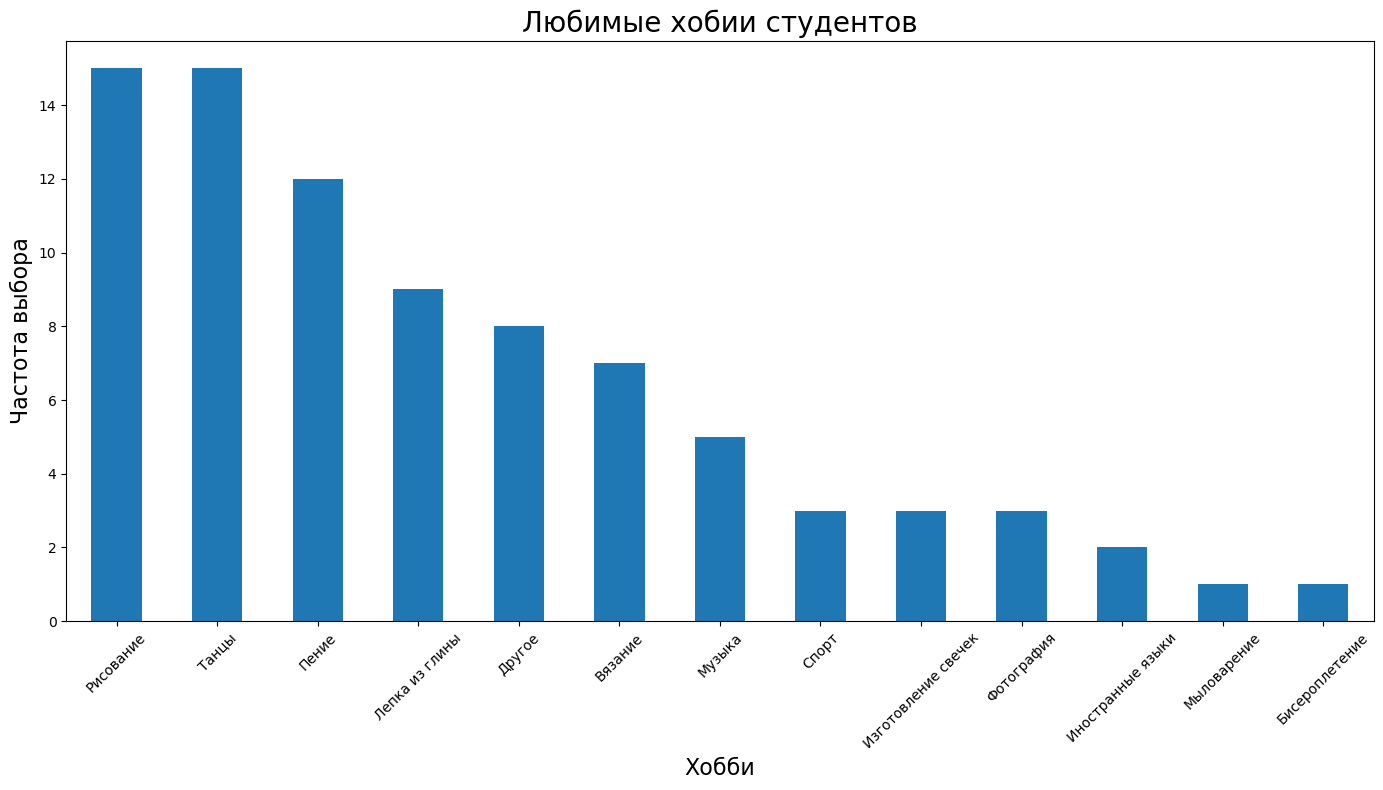

In [26]:
hobby_counts = df['hobby'].value_counts()

plt.figure(figsize=(14, 8))
hobby_counts.plot(kind='bar')
plt.title('Любимые хобии студентов',  fontsize = 20)
plt.xlabel('Хобби',  fontsize = 16)
plt.ylabel('Частота выбора',  fontsize = 16)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

#### Студентам географии ВШЭ важнее что есть или где есть?

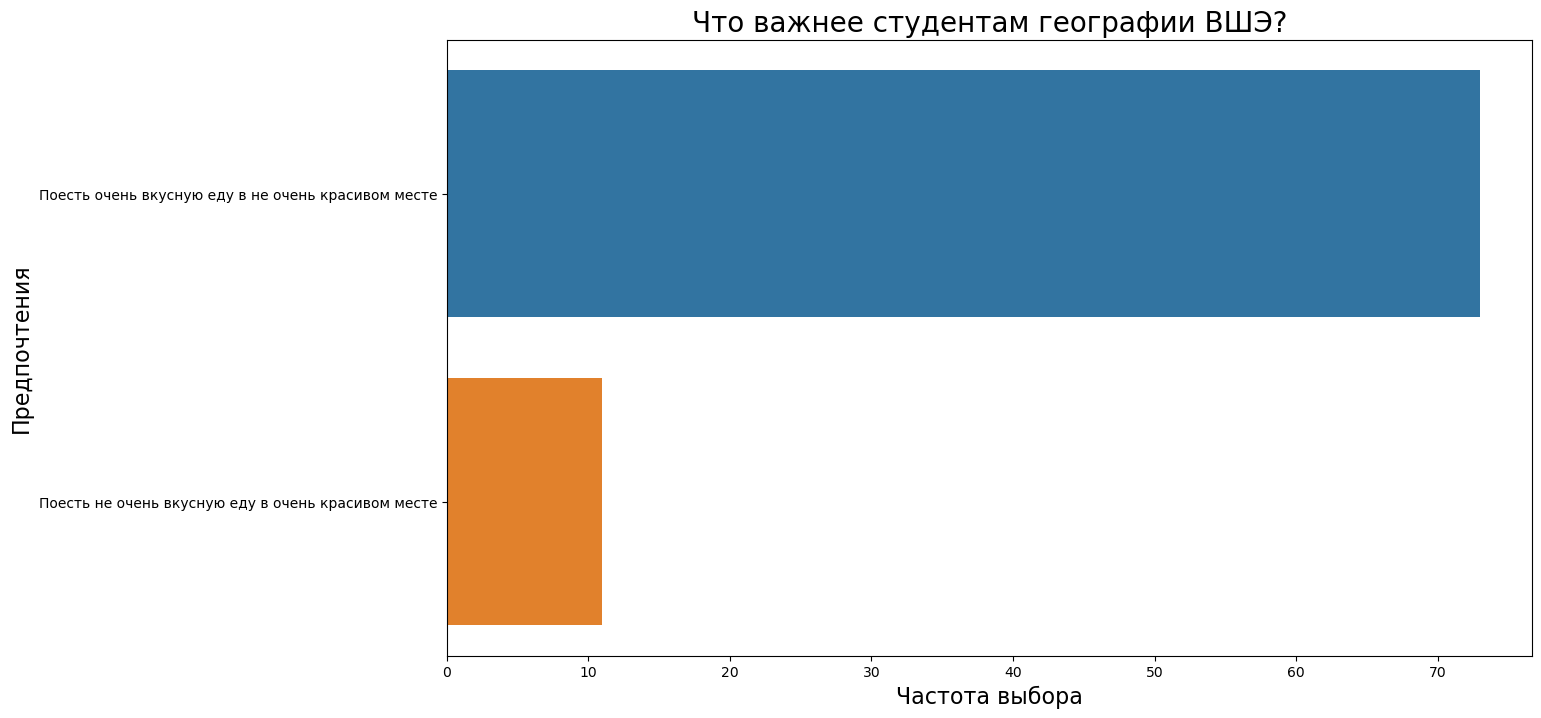

In [34]:
importance_counts = df['importance'].value_counts().reset_index()
importance_counts.columns = ['Importance', 'Frequency']

plt.figure(figsize=(14, 8))
sns.barplot(x='Frequency', y='Importance', data=importance_counts)
plt.title('Что важнее студентам географии ВШЭ?', fontsize = 20)
plt.xlabel('Частота выбора', fontsize = 16)
plt.ylabel('Предпочтения', fontsize = 16)
plt.show()

#### Какого бы питомца себе бы хотели студенты

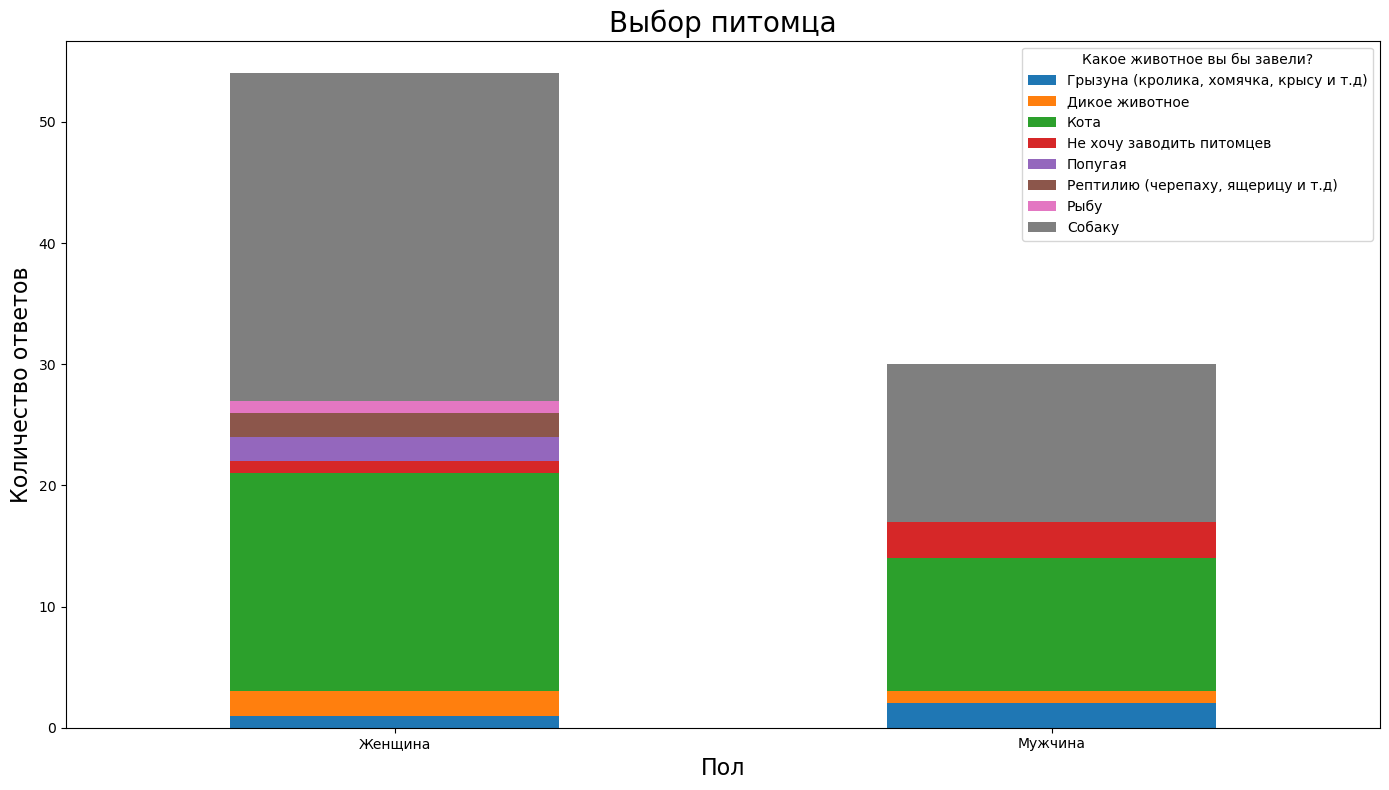

In [38]:
pet_preferences_by_gender = pd.crosstab(df['gender'], df['animal'])

pet_preferences_by_gender.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Выбор питомца', fontsize = 20)
plt.xlabel('Пол', fontsize = 16)
plt.ylabel('Количество ответов', fontsize = 16)
plt.xticks(rotation=0) 
plt.legend(title='Какое животное вы бы завели?')
plt.tight_layout() 
plt.show()

#### Топ-5 хобби у студентов в зависимости от пола

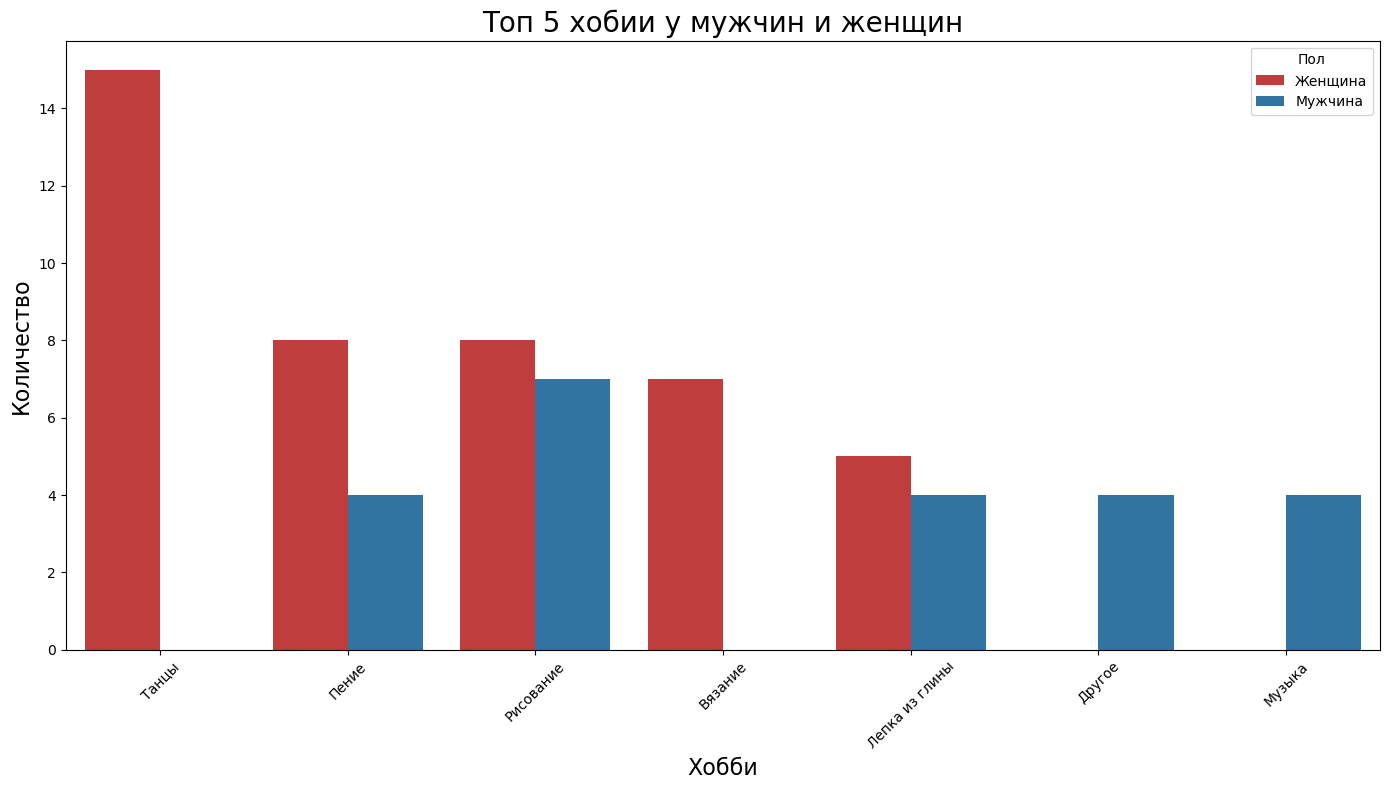

In [52]:
N = 5 

top_hobbies_by_gender = pd.DataFrame()

grouped = df.groupby(['gender', 'hobby']).size().reset_index(name='counts')

for gender in grouped['gender'].unique():
    top_hobbies = grouped[grouped['gender'] == gender].sort_values('counts', ascending=False).head(N)
    top_hobbies_by_gender = pd.concat([top_hobbies_by_gender, top_hobbies])

color_palette = {"Мужчина": "C0", "Женщина": "C3"} 
plt.figure(figsize=(14, 8))
sns.barplot(x='hobby', y='counts', hue='gender', data=top_hobbies_by_gender, palette=color_palette)
plt.title(f'Топ {N} хобии у мужчин и женщин', fontsize = 20)
plt.xlabel('Хобби', fontsize = 16)
plt.ylabel('Количество', fontsize = 16)
plt.xticks(rotation=45)
plt.legend(title='Пол')
plt.tight_layout()
plt.show()

#### Лучшее чувство

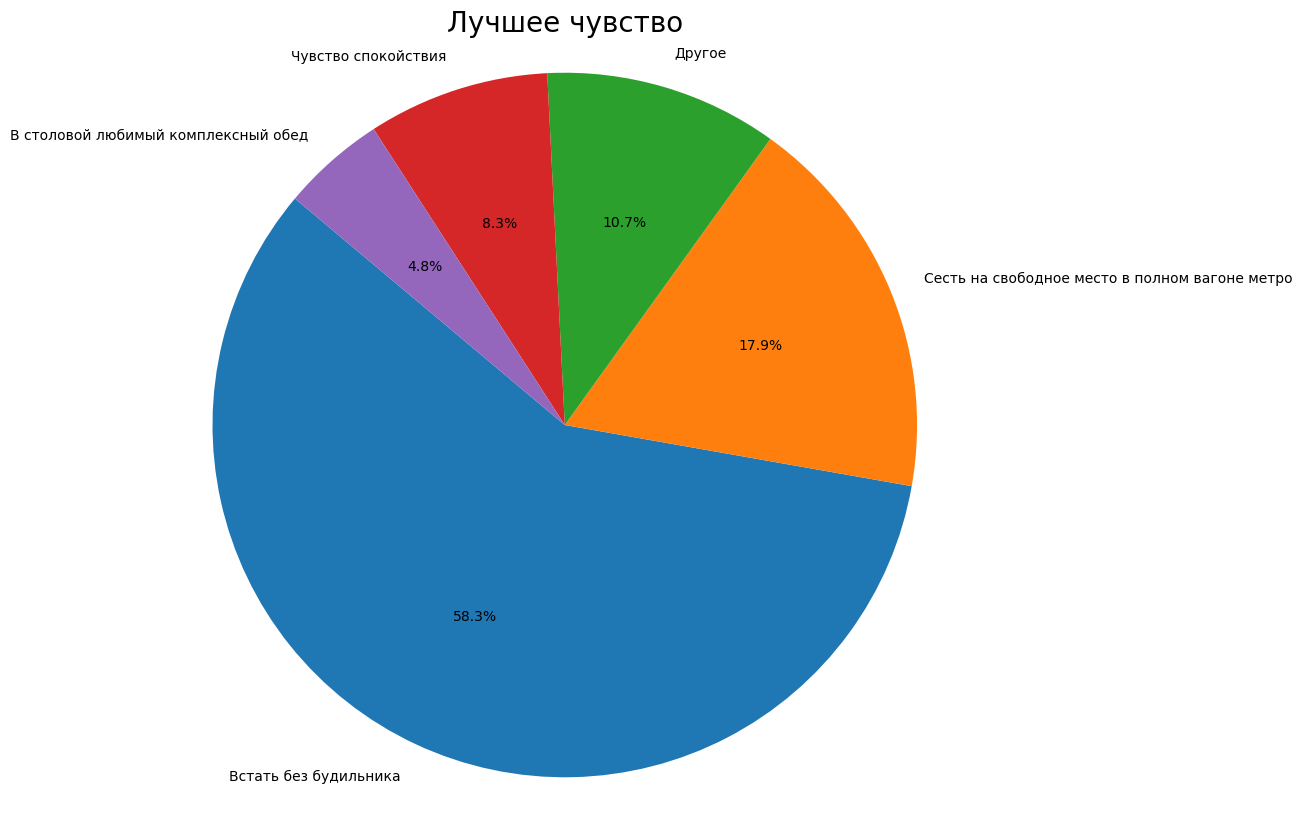

In [62]:
feeling_counts = df['feeling'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(feeling_counts, labels=feeling_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Лучшее чувство', fontsize = 20) 
plt.show()

#### А какие курсы что считают "лучшим чувством"?

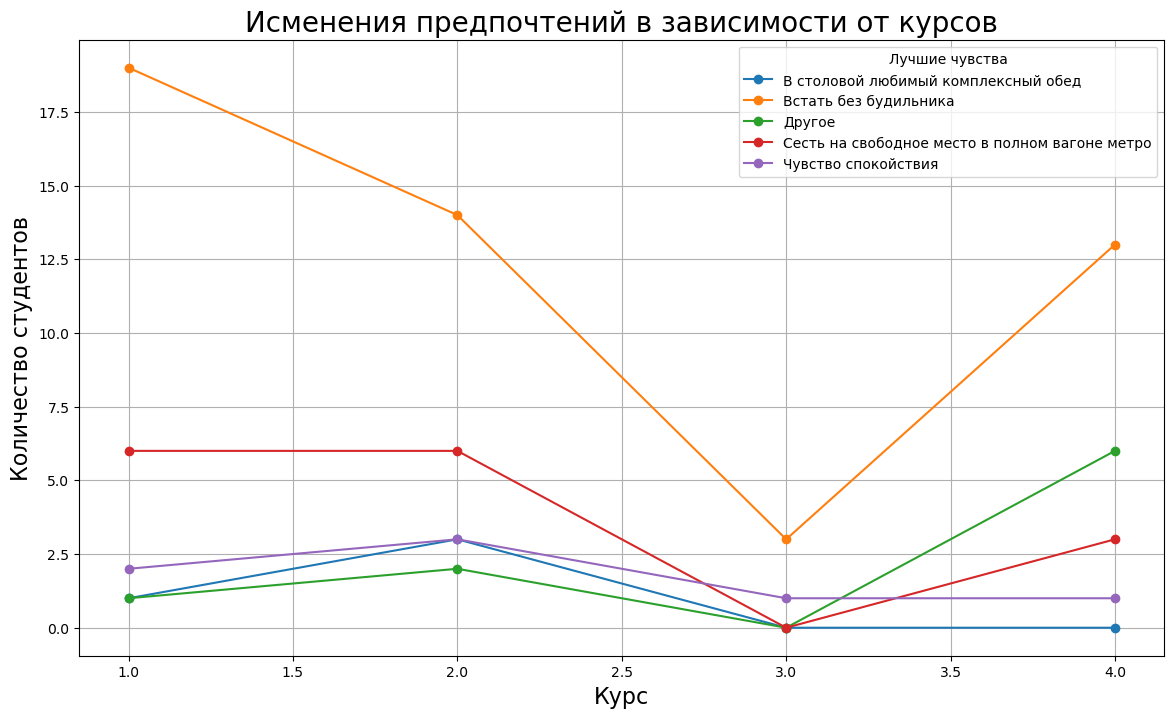

In [70]:
grouped_data = df.groupby(['course', 'feeling']).size().reset_index(name='counts')

pivot_data = grouped_data.pivot(index='course', columns='feeling', values='counts').fillna(0)

plt.figure(figsize=(14, 8))
for feeling in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[feeling], marker='o', label=feeling)
plt.title('Исменения предпочтений в зависимости от курсов', fontsize = 20)
plt.xlabel('Курс', fontsize = 16)
plt.ylabel('Количество студентов', fontsize = 16)
plt.legend(title='Лучшие чувства')
plt.grid(True)
plt.show()

#### Предпочтения в местах прогулок и стандартное отклонение

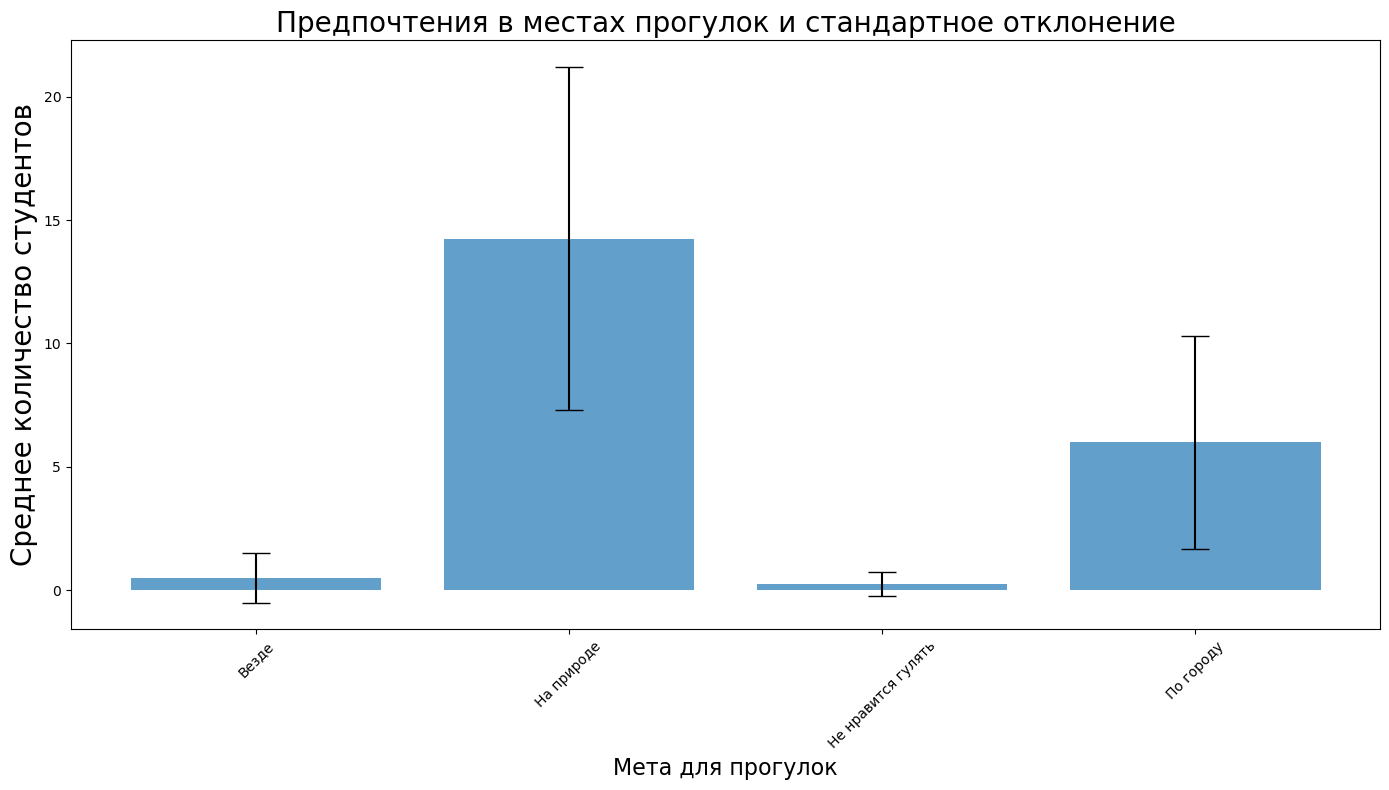

In [72]:
grouped_walk_course = df.groupby(['walking', 'course']).size().unstack(fill_value=0)
walking_means = grouped_walk_course.mean(axis=1)
walking_stds = grouped_walk_course.std(axis=1)

walking_preferences = walking_means.index
x = np.arange(len(walking_preferences)) 

plt.figure(figsize=(14, 8))
plt.bar(x, walking_means, yerr=walking_stds, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.xticks(x, walking_preferences)
plt.ylabel('Среднее количество студентов', fontsize = 20)
plt.title('Предпочтения в местах прогулок и стандартное отклонение', fontsize = 20)
plt.xlabel('Мета для прогулок', fontsize = 16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()